## Importing Libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])
import seaborn as sns
sns.set(color_codes = True)
import math
from datetime import date

## Dataset Instructions
For every engineer, AMEO dataset provides anonymised bio data information along with
their respective skill scores and employment outcome information. Specifically, the
following information is available for every engineer:
1. Scores on Aspiring Minds' AMCAT - a standardized test of job skills. The test includes
cognitive, domain and personality assessments.
2. Personal information like gender and date of birth.
3. Pre-university information like 10th and 12th grade marks, board of education and
12th grade graduation year.
4. University information like GPA, college major, college reputation proxy, graduation
year and college location.
5. The following employment outcome information is available for every engineer:
 First job annual salary
 First job title
 First job location
 Date of joining and leaving of first job

## Loading Dataset

In [249]:
df = pd.read_excel('train.xlsx')

In [250]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [251]:
# dropping extra columns
df.drop('Unnamed: 0',axis=1,inplace=True)

In [252]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

# Visulizations and Analysis 



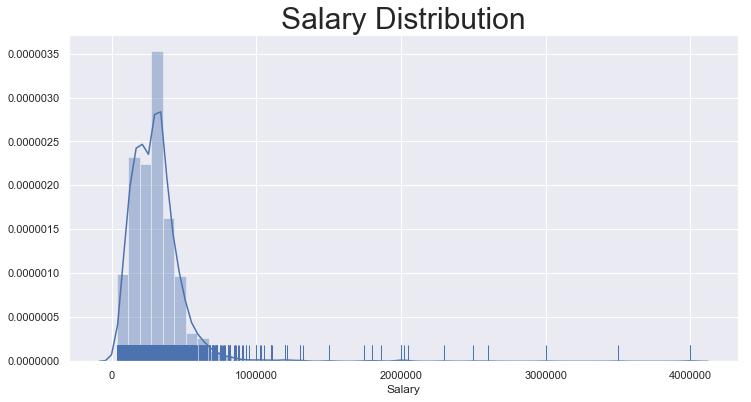

In [254]:
fig = plt.gcf()
fig.set_size_inches(12,6)
sns.distplot(df['Salary'],rug=True);
plt.title("Salary Distribution",fontsize='30');

### Looks like most of the people in our dataset are having salary less than 10lakhs

In [255]:
def calculate_age(dtob):
    today = pd.to_datetime(date.today())
    return today.year - dtob.year - ((today.month, today.day) < (dtob.month, dtob.day))

In [256]:
df['Age'] = df['DOB'].apply(calculate_age)

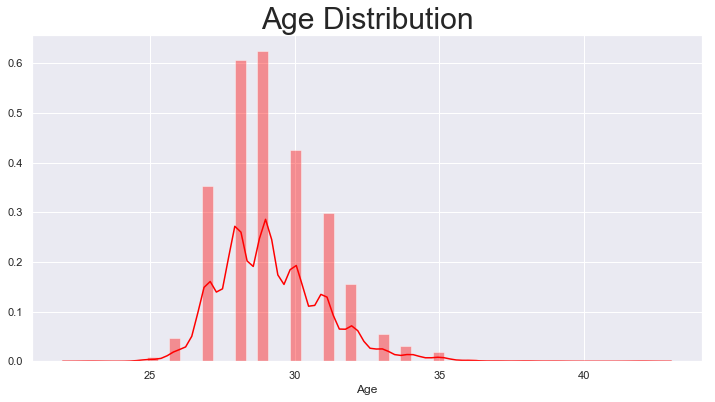

In [257]:
fig = plt.gcf()
fig.set_size_inches(12,6)
sns.distplot(df['Age'],color='red');
plt.title('Age Distribution',fontsize='30');

### Most of the people in our dataset are between 25 and 35

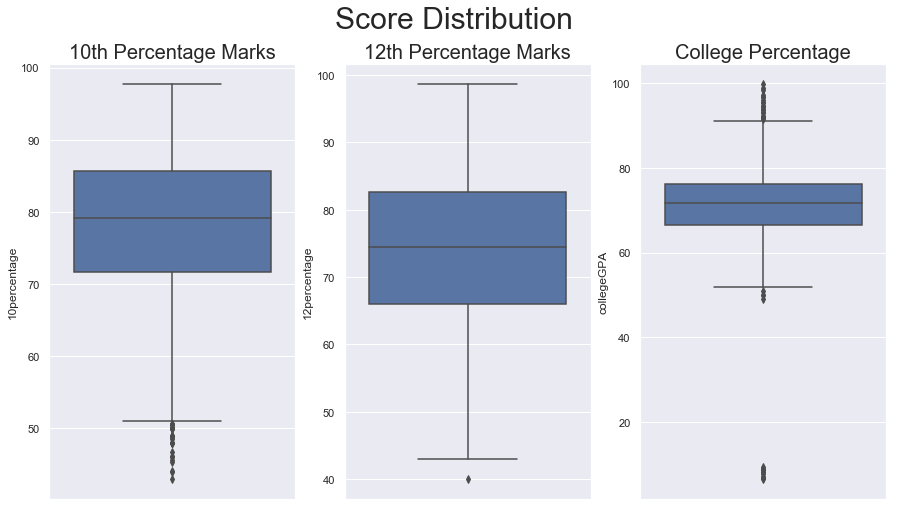

In [258]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(15,8)
fig.suptitle('Score Distribution', fontsize=30)
p1 = sns.boxplot(df['10percentage'], ax=axs[0],orient='v');
p1.set_title('10th Percentage Marks',fontsize='20')
p2 = sns.boxplot(df['12percentage'], ax=axs[1],orient='v');
p2.set_title('12th Percentage Marks',fontsize='20');
p3 = sns.boxplot(df['collegeGPA'], ax=axs[2],orient='v');
p3.set_title('College Percentage',fontsize='20');

### 10th Percentage score are more skewed towards left with some scores below 50 (median = 79%) while 12th Percentage scores have a approximate normal distribution between [40,100] (median = 75%) and College Scores are also left skewed with some of the scores below 20 and a median value of 70%

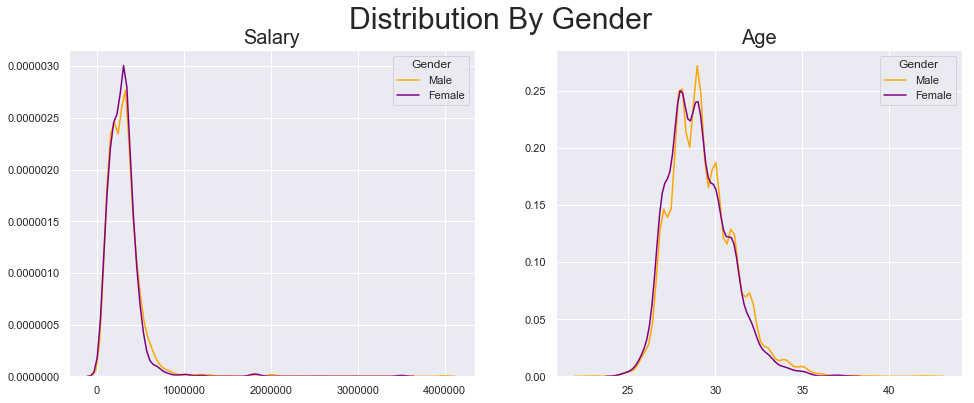

In [259]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(16,6)
fig.suptitle('Distribution By Gender', fontsize=30)
sns.kdeplot(df[df['Gender'] == 'm'].Salary,color='orange', ax=axs[0],label='Male');
p1 = sns.kdeplot(df[df['Gender'] == 'f'].Salary,color='purple', ax=axs[0],label='Female');
p1.legend(title='Gender', labels = ['Male', 'Female']);
p1.set_title("Salary",fontsize='20')
sns.kdeplot(df[df['Gender'] == 'm'].Age,color='orange', ax=axs[1]);
p2 = sns.kdeplot(df[df['Gender'] == 'f'].Age,color='purple', ax=axs[1]);
p2.legend(title='Gender', labels = ['Male', 'Female']);
p2.set_title("Age",fontsize='20');

### The Dataset doesn't seems to be gender biased there are approx. equal number of males and females.

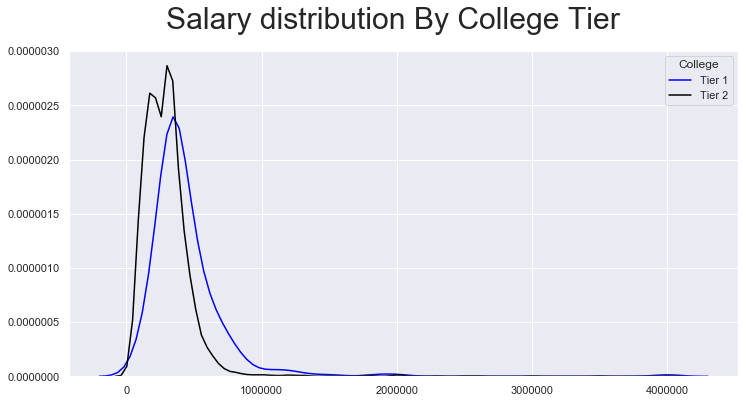

In [260]:
fig = plt.gcf()
fig.set_size_inches(12,6)
fig.suptitle('Salary distribution By College Tier', fontsize=30)
sns.kdeplot(df[df['CollegeTier'] == 1].Salary,color='Blue');
sns.kdeplot(df[df['CollegeTier'] == 2].Salary,color='Black');
plt.legend(title='College', labels = ['Tier 1', 'Tier 2']);

### Looks like Tier 1 colleges have higher salary than tier 2 colleges./

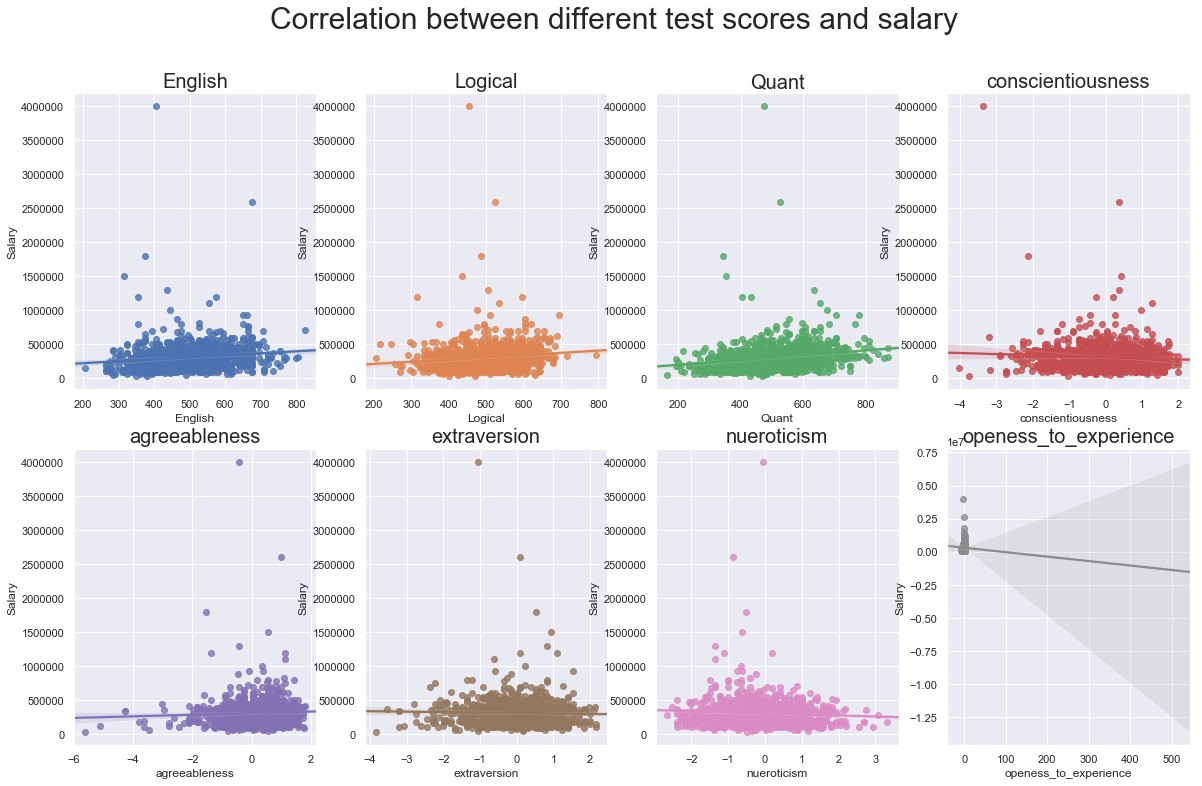

In [261]:
fig, axs = plt.subplots(nrows=2,ncols=4)
fig.set_size_inches(20,12)
fig.suptitle("Correlation between different test scores and salary", fontsize=30)
df_=df.sample(1000)
p1 = sns.regplot(x='English', y='Salary', data=df_,ax=axs[0,0]);
p1.set_title("English",fontsize=20);
p2 = sns.regplot(x='Logical', y='Salary', data=df_,ax=axs[0,1]);
p2.set_title("Logical",fontsize=20);
p3 = sns.regplot(x='Quant', y='Salary', data=df_,ax=axs[0,2]);
p3.set_title("Quant",fontsize=20);
p12 = sns.regplot(x='conscientiousness', y='Salary', data=df_,ax=axs[0,3]);
p12.set_title("conscientiousness",fontsize=20);
p13 = sns.regplot(x='agreeableness', y='Salary', data=df_,ax=axs[1,0]);
p13.set_title("agreeableness",fontsize=20);
p14 = sns.regplot(x='extraversion', y='Salary', data=df_,ax=axs[1,1]);
p14.set_title("extraversion",fontsize=20);
p15 = sns.regplot(x='nueroticism', y='Salary', data=df_,ax=axs[1,2]);
p15.set_title("nueroticism",fontsize=20);
p16 = sns.regplot(x='openess_to_experience', y='Salary', data=df_,ax=axs[1,3]);
p16.set_title("openess_to_experience",fontsize=20);


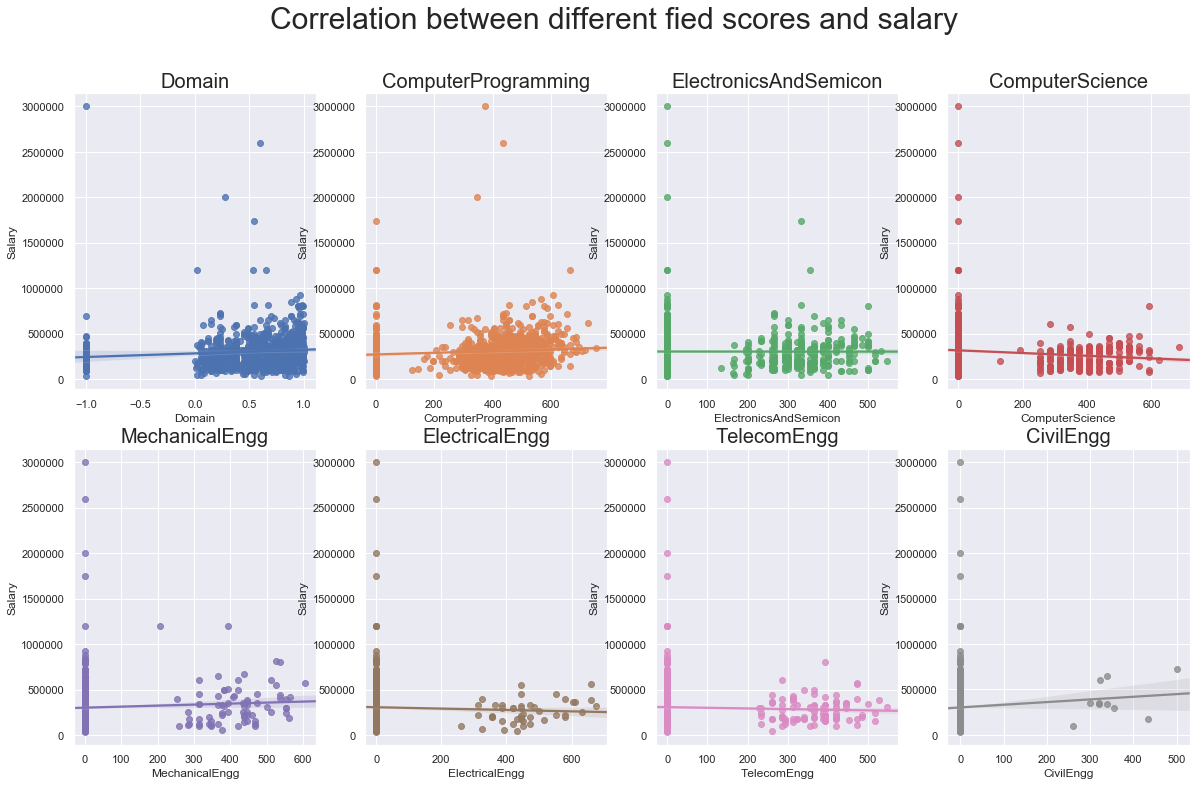

In [262]:
fig, axs = plt.subplots(nrows=2,ncols=4)
fig.set_size_inches(20,12)
fig.suptitle("Correlation between different fied scores and salary", fontsize=30)
df_=df.sample(1000)

p4 = sns.regplot(x='Domain', y='Salary', data=df_,ax=axs[0,0]);
p4.set_title("Domain",fontsize=20);
p5 = sns.regplot(x='ComputerProgramming', y='Salary', data=df_,ax=axs[0,1]);
p5.set_title("ComputerProgramming",fontsize=20)
p6 = sns.regplot(x='ElectronicsAndSemicon', y='Salary', data=df_,ax=axs[0,2]);
p6.set_title("ElectronicsAndSemicon",fontsize=20);
p7 = sns.regplot(x='ComputerScience', y='Salary', data=df_,ax=axs[0,3]);
p7.set_title("ComputerScience",fontsize=20);
p8 = sns.regplot(x='MechanicalEngg', y='Salary', data=df_,ax=axs[1,0]);
p8.set_title("MechanicalEngg",fontsize=20);
p9 = sns.regplot(x='ElectricalEngg', y='Salary', data=df_,ax=axs[1,1]);
p9.set_title("ElectricalEngg",fontsize=20);
p10 = sns.regplot(x='TelecomEngg', y='Salary', data=df_,ax=axs[1,2]);
p10.set_title("TelecomEngg",fontsize=20);
p11 = sns.regplot(x='CivilEngg', y='Salary', data=df_,ax=axs[1,3]);
p11.set_title("CivilEngg",fontsize=20);

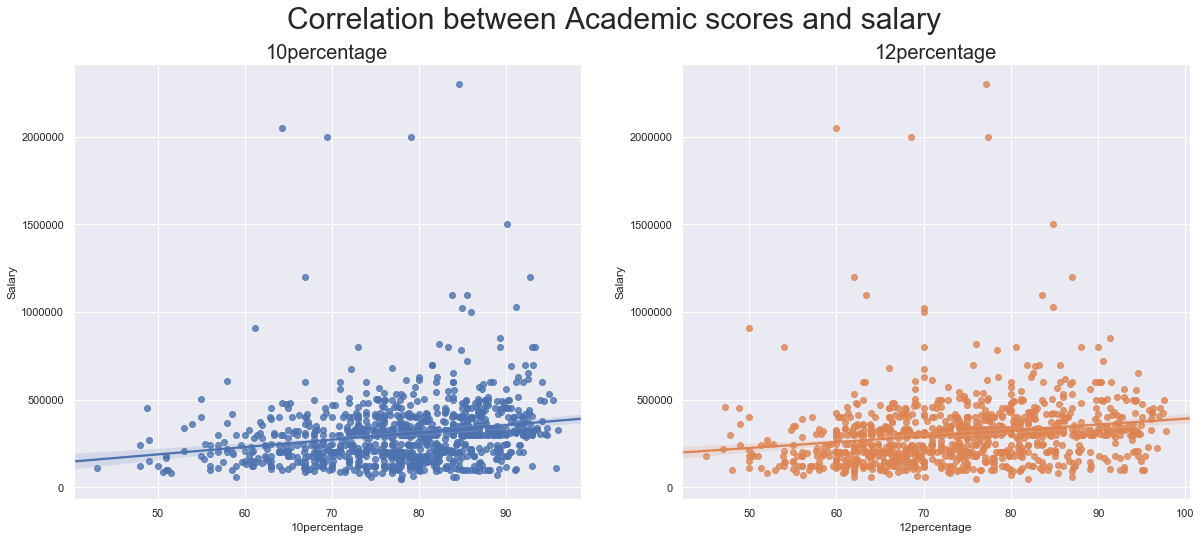

In [263]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(20,8)
fig.suptitle("Correlation between Academic scores and salary", fontsize=30)
df_=df.sample(1000)
p1 = sns.regplot(x='10percentage', y='Salary', data=df_,ax=axs[0]);
p1.set_title("10percentage",fontsize=20);
p3 = sns.regplot(x='12percentage', y='Salary', data=df_,ax=axs[1]);
p3.set_title("12percentage",fontsize=20);

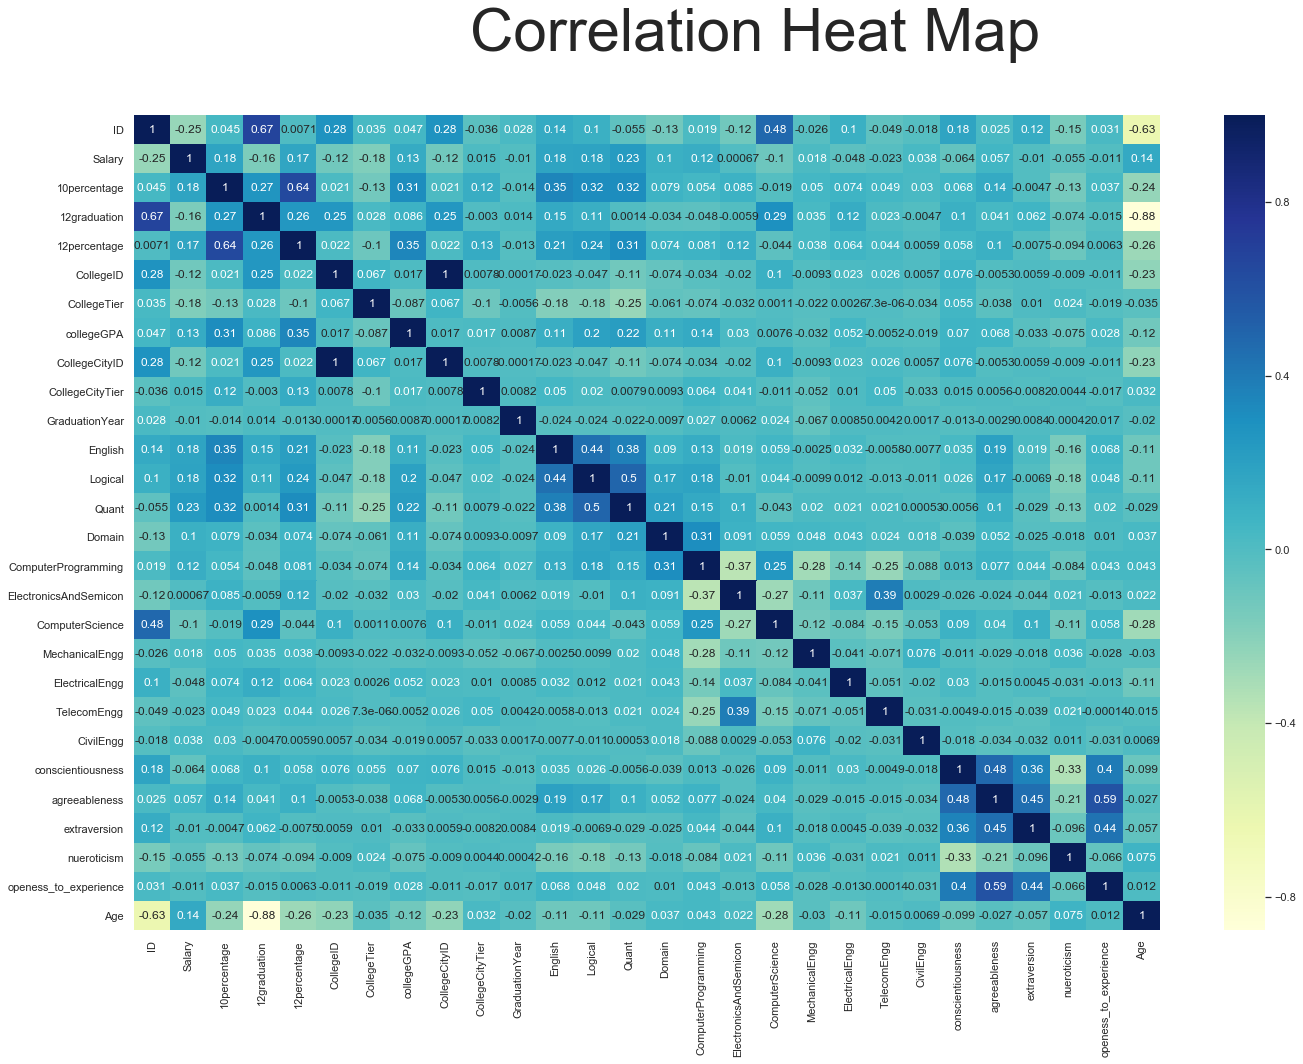

In [276]:
corrMatrix = df.corr()
fig = plt.gcf()
fig.suptitle("Correlation Heat Map",fontsize=60)
fig.set_size_inches(23,15)
sns.heatmap(corrMatrix, annot=True, cmap='YlGnBu');

### From the above heat map of correlation matrix we can infer that there is no direct strong correalation between salary and other variables